In [78]:
new_df_test = pd.read_excel('testing_prostate_cancer_dataf.xlsx', sheet_name=0)
new_df_test = new_df_test.drop(['metaphase size', 'notes', 'inversion size'], axis=1)

In [79]:
new_df_test.head(4)

,patient id,timepoint,cell number,chromosome,# translocations,# inversions,# terminal inversions,# sister chromatid exchanges,# satellite associations
0,1,1 non irrad,1,1,0,0,0,0,0
1,1,1 non irrad,1,2,0,1,0,0,0
2,1,1 non irrad,1,3,0,0,0,0,0
3,1,1 non irrad,2,1,0,0,0,0,0


In [58]:
old_df_test = pd.read_excel('testing_prostate_cancer_dataf.xlsx', sheet_name=1)
old_df_test = old_df_test.drop(['metaphase size', 'notes'], axis=1)

In [59]:
old_df_test.head(4)

,patient id,timepoint,cell number,# translocations,inversion size,# inversions,# terminal inversions,# sister chromatid exchanges,# satellite associations
0,1,1 non irrad,1,0,NaN,0,0,0,0
1,1,1 non irrad,2,0,NaN,1,0,0,0
2,1,1 non irrad,3,0,NaN,0,0,0,0
3,1,1 non irrad,4,0,NaN,1,0,0,0


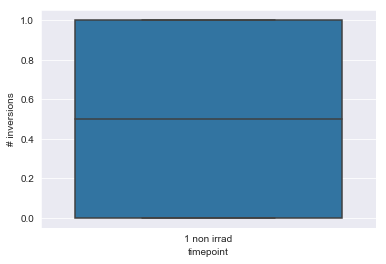

In [43]:
sns.boxplot(x='timepoint', y='# inversions', data = old_df_test[old_df_test['patient id'] == 1])

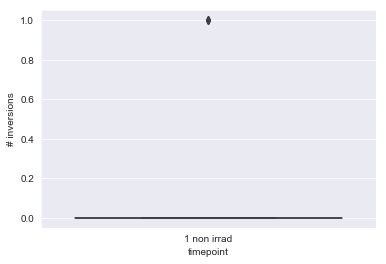

In [44]:
sns.boxplot(x='timepoint', y='# inversions', data = new_df_test[new_df_test['patient id'] == 1])

In [54]:
melt_old_df_test = pd.melt(old_df_test,
       id_vars=['patient id', 'timepoint', 'cell number'],
       var_name='aberration type',
       value_name='count per cell')

melt_old_df_test.head(4)

,patient id,timepoint,cell number,aberration type,count per cell
0,1,1 non irrad,1,# translocations,0.0
1,1,1 non irrad,2,# translocations,0.0
2,1,1 non irrad,3,# translocations,0.0
3,1,1 non irrad,4,# translocations,0.0


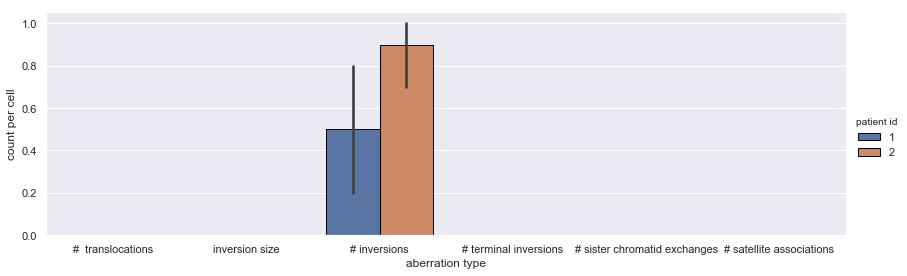

In [115]:
# print(old_df_test.dtypes, melt_old_df_test.dtypes)

ax = sns.set(font_scale=1)
ax = sns.set_style(style="darkgrid",rc= {'patch.edgecolor': 'black'})
ax = sns.catplot(x='aberration type', y='count per cell', 
                 hue='patient id', kind='bar', orient='v', 
                 height=4, aspect=3, data=melt_old_df_test)

In [80]:
# new_df_test.head(1)
new_df_test.columns

Index(['patient id', 'timepoint', 'cell number', 'chromosome',
       '#  translocations', '# inversions', '# terminal inversions',
       '# sister chromatid exchanges', '# satellite associations'],
      dtype='object')

In [81]:
melt_new_df_test = pd.melt(new_df_test,
       id_vars=['patient id', 'timepoint', 'cell number', 'chromosome'],
       var_name='aberration type',
       value_name='count per cell')

melt_new_df_test.head(4)

,patient id,timepoint,cell number,chromosome,aberration type,count per cell
0,1,1 non irrad,1,1,# translocations,0
1,1,1 non irrad,1,2,# translocations,0
2,1,1 non irrad,1,3,# translocations,0
3,1,1 non irrad,2,1,# translocations,0


In [82]:
print(new_df_test.dtypes, melt_new_df_test.dtypes)

patient id                       int64
timepoint                       object
cell number                      int64
chromosome                       int64
#  translocations                int64
# inversions                     int64
# terminal inversions            int64
# sister chromatid exchanges     int64
# satellite associations         int64
dtype: object patient id          int64
timepoint          object
cell number         int64
chromosome          int64
aberration type    object
count per cell      int64
dtype: object


Text(0.5, 0.98, 'when parsing data using chromosome as HUE.. data is graphed CORRECTLY')

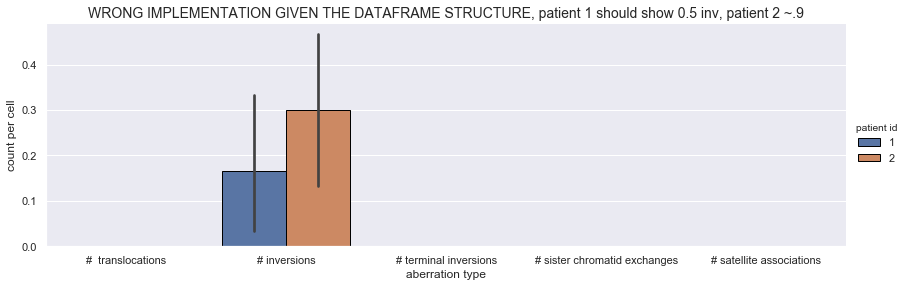

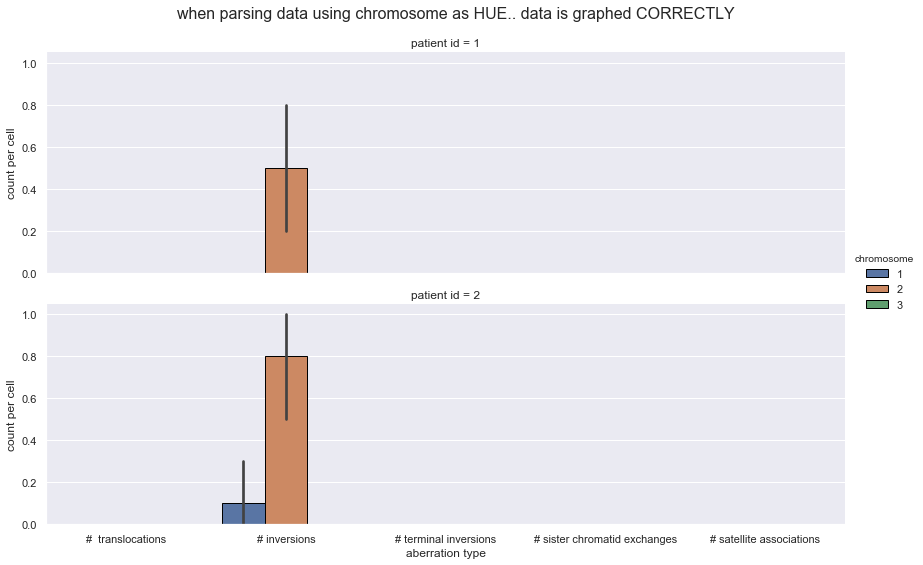

In [130]:
ax = sns.set(font_scale=1)
ax = sns.set_style(style="darkgrid",rc= {'patch.edgecolor': 'black'})
ax = sns.catplot(x='aberration type', y='count per cell', 
                 hue='patient id', kind='bar', orient='v', 
                 height=4, aspect=3, data=melt_new_df_test)
plt.title('WRONG IMPLEMENTATION GIVEN THE DATAFRAME STRUCTURE, patient 1 should show 0.5 inv, patient 2 ~.9', fontsize=14)


ax1 = sns.set(font_scale=1)
ax1 = sns.set_style(style="darkgrid",rc= {'patch.edgecolor': 'black'})
ax1 = sns.catplot(x='aberration type', y='count per cell', 
                 hue='chromosome', kind='bar', orient='v', col='patient id', col_wrap=1,
                 height=4, aspect=3, data=melt_new_df_test)
g = plt.gcf()
g.subplots_adjust(top=0.9)
g.suptitle('when parsing data using chromosome as HUE.. data is graphed CORRECTLY', fontsize=16)

In [ ]:
# okay, so they are different - what to do ? if i record each chr.. i need to put zeros to represent stuff not being there
# if i put NaNs.. it wont be understood as zeros.. will it? 

# OH! but if i graph it & break it out by col.. it works great!

# its okay to keep the dataframe as is i think.. i may need to devise a way to collapse the
# counts of aberrations per chromosome into counts per cell, ala taking 3 rows and adding results into one ,
# to plot ...
# but what about translocations? they wont fit in the current 'new_df' counting paradigm 
# oh! i could have two columns for translocations.. intra 1,2,3 & extra 1,2,3
# translocations intra 1,2,3 to be graphed with inversions per chromosome ... translocations extra plus intra to be graphed with
# all aberrations at once 

# solution to combining rows, shown graphically below: 
# new_df_test.groupby(['patient id', 'timepoint', 'cell number'], as_index=False).agg('sum')

In [99]:
new_df_test.head(4)

,patient id,timepoint,cell number,chromosome,# translocations,# inversions,# terminal inversions,# sister chromatid exchanges,# satellite associations
0,1,1 non irrad,1,1,0,0,0,0,0
1,1,1 non irrad,1,2,0,1,0,0,0
2,1,1 non irrad,1,3,0,0,0,0,0
3,1,1 non irrad,2,1,0,0,0,0,0


In [107]:
test_grp = new_df_test.groupby('patient id')
test_grp_1 = test_grp.get_group(1)
test_grp_1.head(4)

,patient id,timepoint,cell number,chromosome,# translocations,# inversions,# terminal inversions,# sister chromatid exchanges,# satellite associations
0,1,1 non irrad,1,1,0,0,0,0,0
1,1,1 non irrad,1,2,0,1,0,0,0
2,1,1 non irrad,1,3,0,0,0,0,0
3,1,1 non irrad,2,1,0,0,0,0,0


In [110]:
test_grp2 = new_df_test.groupby('patient id')['cell number']
test_grp_2 = test_grp.get_group(1)
# test_grp_2

In [132]:
# here is how ill combine my data !!!!
# nice, problem solved 
# data should be combined prior to analyzing translocations extra 1,2,3

test_grp3 = new_df_test.groupby(['patient id', 'timepoint', 'cell number'], as_index=False).agg('sum')
test_grp3.head(4)

,patient id,timepoint,cell number,chromosome,# translocations,# inversions,# terminal inversions,# sister chromatid exchanges,# satellite associations
0,1,1 non irrad,1,6,0,1,0,0,0
1,1,1 non irrad,2,6,0,1,0,0,0
2,1,1 non irrad,3,6,0,1,0,0,0
3,1,1 non irrad,4,6,0,1,0,0,0


In [118]:
melt_test_grp3 = pd.melt(test_grp3,
       id_vars=['patient id', 'timepoint', 'cell number', 'chromosome'],
       var_name='aberration type',
       value_name='count per cell')

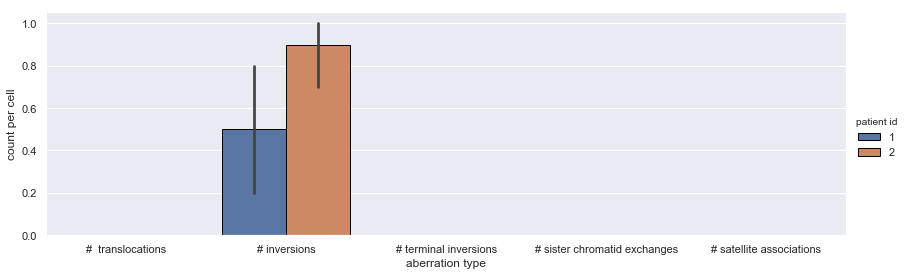

In [119]:
ax = sns.set(font_scale=1)
ax = sns.set_style(style="darkgrid",rc= {'patch.edgecolor': 'black'})
ax = sns.catplot(x='aberration type', y='count per cell', 
                 hue='patient id', kind='bar', orient='v', 
                 height=4, aspect=3, data=melt_test_grp3)

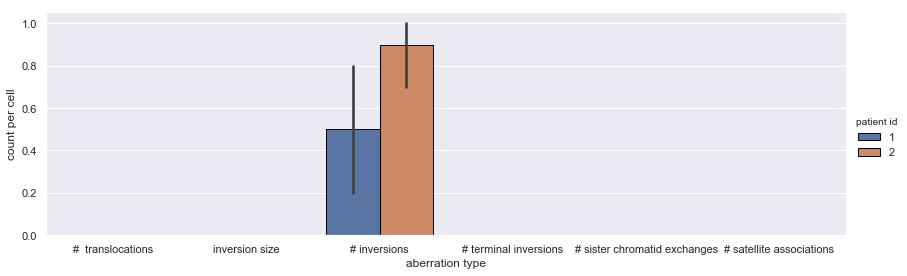

In [116]:
ax = sns.set(font_scale=1)
ax = sns.set_style(style="darkgrid",rc= {'patch.edgecolor': 'black'})
ax = sns.catplot(x='aberration type', y='count per cell', 
                 hue='patient id', kind='bar', orient='v', 
                 height=4, aspect=3, data=melt_old_df_test)

In [ ]:
# to analyze data per chromosome, drop translocations extra, melt & plot using chromosome as the hue

# to analyze data per cell, add translocations extra to intra, ala:  
# df['translocations total'] = df['translocations extra'] + df['translocations intra'] 
# drop translocations extra/intra & chromosome, 

# then merge rows per cell using groupby + :
# merging_rows.groupby(['patient id', 'timepoint', 'cell number'], as_index=False).agg('sum')
# this process yields a dataframe functionally equivalent to that used for the astros!